# Binary classifier for tumor classfication

#### This MLP classifier is designed to classify the presence tumor using the gene expression data.
#### Import all the required python dependencies

In [20]:
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from costcla.models import CostSensitiveRandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

#### Importing the Dataset, selecting the best features by using the PCA transform variance plot where selecting the no of axis with high variance 

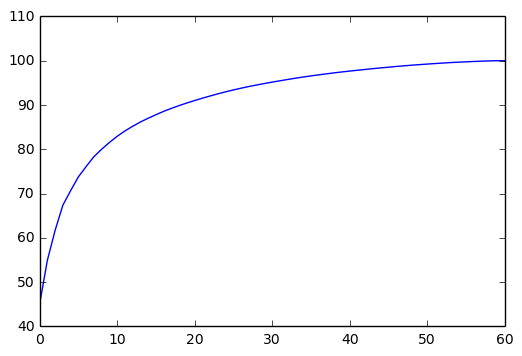

In [22]:
data = pd.read_csv('colonTumor.data');
datasets = data.values
X = datasets[:,0:2000]
Y = datasets[:,2000]
X = scale(X)
pca = PCA(n_components=61)
pca.fit(X)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

#### The polt shows the  variance curve on the datset and it indicates that the variance converges after in the range of 38 to 42 and further transform the dataset to the axis of 40 features

#### Based on the above variance graph gives that around 38-40 features will scaled down
#### Spliting the dataset accordingly so that the 80% is given to the training set and also assigning the rest 20% to the test dataset

In [3]:
pca = PCA(n_components=40)
pca.fit(X)
X1=pca.fit_transform(X)
X_train = X1[0:40,:]
Y_train = Y[0:40]
X_test = X1[40:61,:]
Y_test = Y[40:61]
print Y_test

[ 1.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.
  1.  0.  1.]


#### creating the cost matrix for the cost sensititive classification which is important to classify the skewed dataset cost matrix is created based on the factor of number of smaples belonging to the each class. The format of the cost matrix is as follows : [n_samples, 4] there each column represents false positives, false negatives, true positives and true negatives, for each example.

In [16]:
mat = np.zeros((61,4))
mat[:,0] = 0.55 * np.ones(61)
mat[:,1] = 1.5 * np.ones(61)
cost_mat_train = mat[0:40,:]
cost_mat_test = mat[40:61,:]

#### binary classification using cost sensititve random forest classifier with weighted_voting combination

In [17]:
f = CostSensitiveRandomForestClassifier(n_estimators = 25,combination="weighted_voting")
model = f.fit(X_train, Y_train, cost_mat_train)

#### Predict the output from the trained model and print the output

In [18]:
Y_pred = model.predict(X_test)
print Y_pred

[ 1.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  1.  0.  1.]


#### compare the results with the actual prediction and calculate the accuracy of the trained model

In [19]:
target_names = ['class negative', 'class positive']
print(classification_report(Y_test, Y_pred, target_names=target_names))
score = accuracy_score(Y_test , Y_pred)
print(
        "Accuracy is: %.1f%%" %
        (score* 100)
    )

                precision    recall  f1-score   support

class negative       0.85      0.92      0.88        12
class positive       0.88      0.78      0.82         9

   avg / total       0.86      0.86      0.86        21

Accuracy is: 85.7%
